<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/visualizaciondedatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos
## Ejercicio de volúmenes de ventas con matplotlib

### Patricia Mediavilla Pardilla

Este ejercicio consiste en contestar a algunas preguntas utilizando la librería matplotlib.

Lo primero que debemos hacer es instalar la librería para poder utilizarla.

In [13]:
pip install plotly_express

In [14]:
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt

Una vez instaladas las librerías con las que vamos a trabajar, cargamos la base de datos para poner comprender los datos y procesarlos si es necesario.

In [15]:
df = pd.read_csv('eu_sample_2.csv', sep=',')
df.head()

,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
0,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,20969.017914
1,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,141.987137
2,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1058.399611
3,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,30813.110677
4,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,2254.041831


Comprendemos la base de datos donde sabemos:
- YR: año
- PRD: periodo
- MONTH: mes
- DATE: fecha
- SCENTRO: scenario, pero son todos actuales
- MU: market unit
- BU: Business unit
- SCTR: Continente
- CNTRY: Pais
- SUBBRAND: product que ha tenido ese volumen
- AMT: valor, volumen de venta

Vamos a explorar si hay valores faltantes o si todos los datos son válidos.



In [16]:
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

YR          0
PRD         0
MONTH       0
DATE        0
SCENRO      0
MU          0
BU          0
SCTR        0
CNTRY       0
SUBBRAND    0
AMT         0
dtype: int64


Observamos que no hay valores faltantes, a continuación veremos como se distribuyen los datos numéricos, con el fin de ver si hay outliers o valores erroneos.

In [17]:
resumen_estadistico = df.describe()
print(resumen_estadistico)

                YR          PRD        MONTH           AMT
count  5399.000000  5399.000000  5399.000000  5.399000e+03
mean   2017.510835     7.628820     6.628820  1.972712e+05
std       0.499929     3.466565     3.466565  6.769013e+05
min    2017.000000     2.000000     1.000000 -1.509378e+05
25%    2017.000000     5.000000     4.000000  7.108339e+03
50%    2018.000000     8.000000     7.000000  2.861272e+04
75%    2018.000000    11.000000    10.000000  9.838589e+04
max    2018.000000    13.000000    12.000000  9.808218e+06


Todos los mínimos y máximos están bien repartidos, no hay outliers. A simple vista las tres primeras varibles se distribuyen de una forma acertada que no nos van a dar ningún problema a la hora de operar con esos datos. Sin embargo, en la variable AMT encontramos valores negativos, que pertenece a los valores de las ventas, pues las ventas no pueden ser negativas.



In [18]:
df['AMT'] = df['AMT'][df['AMT'] >= 0]

resumen_AMT = df['AMT'].describe()
resumen_AMT

count    5.367000e+03
mean     1.985485e+05
std      6.787065e+05
min      0.000000e+00
25%      7.330213e+03
50%      2.893160e+04
75%      9.923847e+04
max      9.808218e+06
Name: AMT, dtype: float64

Ahora ya tenemos todos los valores positivos, por lo tanto todos nuestros datos númericos son válidos.

En cuanto a las variables no numéricas, vamos a ver los valores y la frecuencia de cada uno para considerar si son extraños.

In [19]:
# Lista de columnas que deseas analizar
columnas = ['DATE', 'SCENRO', 'MU', 'BU', 'SCTR', 'CNTRY', 'SUBBRAND']

# Itera a través de las columnas y muestra el conteo de valores únicos
for columna in columnas:
    conteo_valores = df[columna].value_counts()
    print(f'Conteo de valores en la columna "{columna}":')
    print(conteo_valores)
    print('\n')

Conteo de valores en la columna "DATE":
2018-12-01    268
2018-11-01    254
2017-09-01    228
2018-07-01    227
2017-12-01    226
2017-11-01    226
2018-08-01    226
2018-05-01    226
2017-08-01    226
2018-10-01    225
2017-10-01    225
2017-07-01    225
2018-06-01    225
2017-06-01    224
2018-09-01    224
2018-03-01    224
2018-02-01    222
2018-04-01    221
2018-01-01    216
2017-05-01    215
2017-03-01    215
2017-04-01    211
2017-01-01    211
2017-02-01    209
Name: DATE, dtype: int64


Conteo de valores en la columna "SCENRO":
Actual    5399
Name: SCENRO, dtype: int64


Conteo de valores en la columna "MU":
CE FOBO      2028
NE FOBO      1214
BCCA FOBO     903
GBI FOBO      383
Spain         305
Portugal      185
DACH          144
Italy         141
Belgium        96
Name: MU, dtype: int64


Conteo de valores en la columna "BU":
FOBO BU    4528
SWE         631
NE          240
Name: BU, dtype: int64


Conteo de valores en la columna "SCTR":
Europe    5399
Name: SCTR, dtype: int64

Vemos que no hay ningún dato extraño que nos llame la atención, por lo que ya podemos empezar nuestro ejercicio.


## 1. Market Unit y Business Unit

### 1.1 ¿Cuál es la distribución de volumen estre las MU y las BU (por separado)?

Para realizar este ejercicio considero que la mejor forma de representar volumen en una misma variable con distintos datos en un gráfico de barras en el que podemos comprar facilmente cual es la densidad o cantidad de cada una así como cuales son los valores que contienen las dos varibles que vamos a represntar las Market Unit y las Bussines Units.

A continuación vamos a representar primero el volumen de todas las Market Unit.

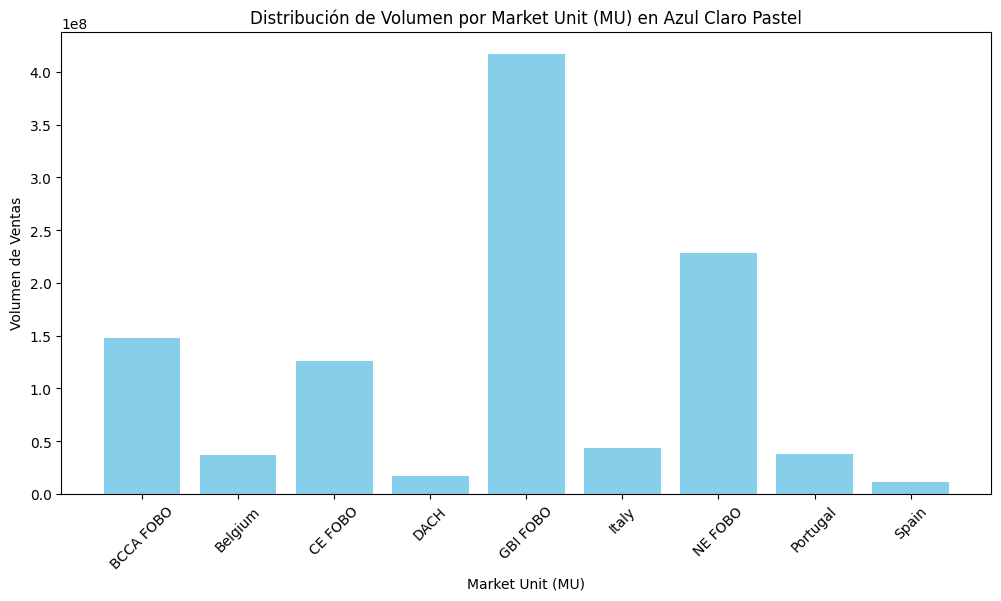

In [40]:
# Agrupa los datos por MU y calcula el volumen total en cada MU
mu_volumen = df.groupby('MU')['AMT'].sum()

# Grafica la distribución de volumen por MU con un solo color de azul claro pastel
plt.figure(figsize=(12, 6))

# Crea una lista de colores, todas iguales
colores = ['#87CEEB'] * len(mu_volumen)

plt.bar(mu_volumen.index, mu_volumen.values, color=colores)
plt.xlabel('Market Unit (MU)')
plt.ylabel('Volumen de Ventas')
plt.title('Distribución de Volumen por Market Unit (MU) en Azul Claro Pastel')
plt.xticks(rotation=45)
plt.show()

Como observamos tenemos 9 Market Units. La que más volumen de venta tiene con bastante diferencia es GBI FOBO, seguida de NE FOBO.

Vemos que hay bastante diferencia entre todas las Market Units, no está anda equilibrado y hay mucha direncia entre unas y otras, como podrías ser Spain con GBI FOBO.

Se ve claramente la gráfica se distribuye en doa grupos 4 con más volumen de ventas (GBI FOBO, NE FOBO, BCCA FOBO y CE FOBO) y las 5 restantes con menor volumen de ventas (Belgium, DACH, Italy, Portugal y Spain).


A continuación veremos la distribución de vantas de las Bussines Units.

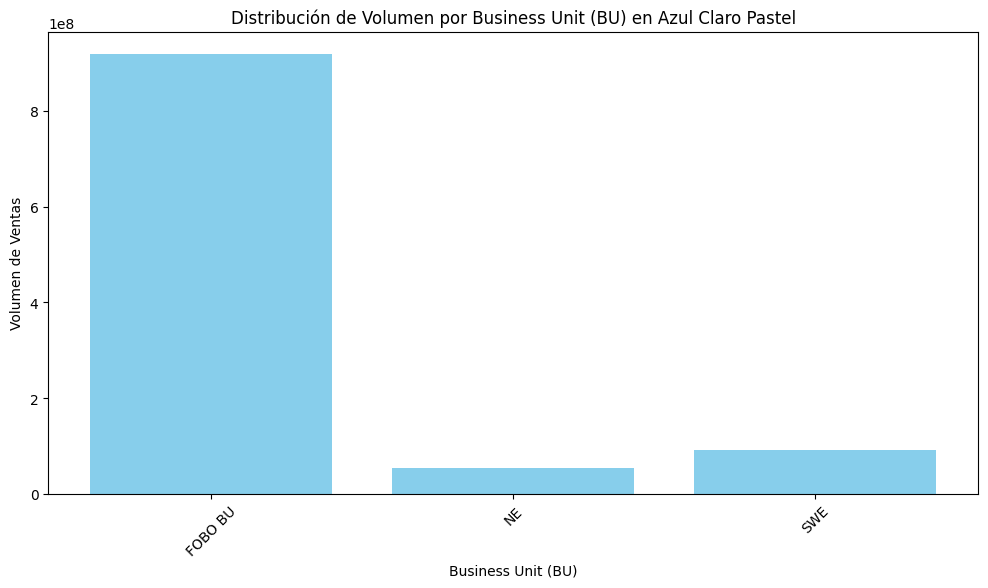

In [38]:
#Grafica la distribución de volumen por BU con un solo color de azul claro pastel
plt.figure(figsize=(12, 6))

# Crea una lista de colores, todas iguales
colores = ['#87CEEB'] * len(bu_volumen)

plt.bar(bu_volumen.index, bu_volumen.values, color=colores)
plt.xlabel('Business Unit (BU)')
plt.ylabel('Volumen de Ventas')
plt.title('Distribución de Volumen por Business Unit (BU) en Azul Claro Pastel')
plt.xticks(rotation=45)
plt.show()

Solo hay tres Bussines Units, bastante desiquilibradas. Observamos que la BU con más volumen de ventas es con mucha diferencia FOBO BU.
Las otras dos BU están más equilibradas aunque un poco por encima SWE frente a NE.

Hemos vuelto a usar el diagrama de barras ya que represnta muy bien el volumen de una variable frente a las categorías de otra variable.

### 1.2 ¿Cuáles son las M U con más volumen?

Ya hemos visto que para represntar volumen de una varible frente a otra es muy útil el diagrama de barras, en este caso, la pregunta ya se ha contestado más o menos en el ejercicio anterior.

Para representar bien las MU con más volumen vamos a coger las que tienen mayor volumen de ventas y vamos a ponerlas en otro color para poner diferenciarlas mejor a pesar de que ya en el diagrama se va a ver claro porque van a ser las más largas refiriendonos a las barras del diagrama.

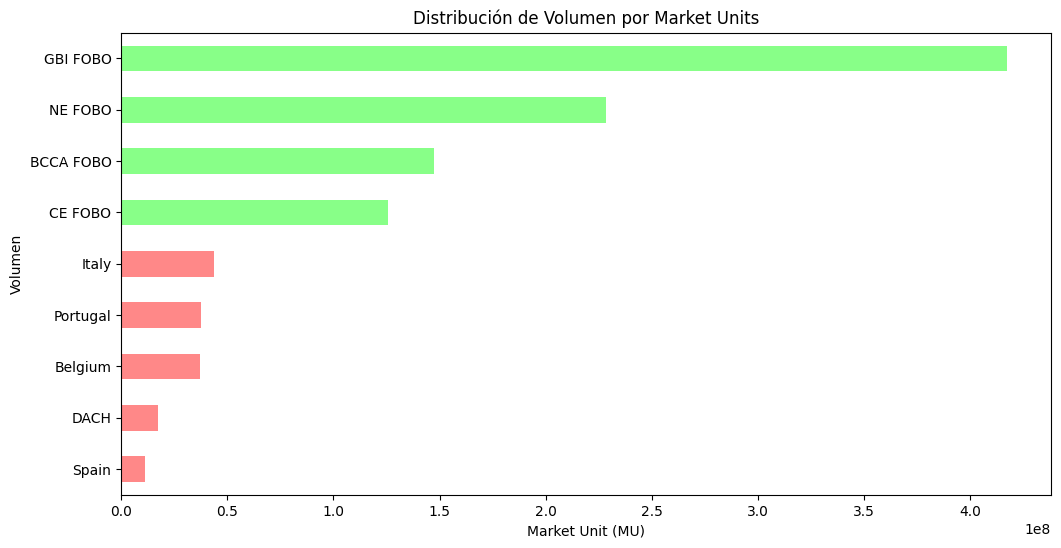

In [31]:
#Ordenamos los volumenes de venta
mu_volumen = mu_volumen.sort_values(ascending=True)

# Calcular las MU con más volumen
top_mu = mu_volumen.nlargest(4)  # Tomamos solo las 4 primeras MU con más volumen.

# Colores en función de si la MU está en las 4 primeras o no
colores = ['#88ff88' if mu in top_mu.index else '#ff8888' for mu in mu_volumen.index]

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
mu_volumen.plot(kind="barh", color=colores)
plt.title("Distribución de Volumen por Market Units")
plt.xlabel("Market Unit (MU)")
plt.ylabel("Volumen")
plt.show()

De esta manera vemos ordenadamente las MU de mayor volumen de venta a menor volumen de ventas. Además utilizamos los colores para remarcar más esa diferencia de las que más volumen tienen.

Las MU con mayor volumen son las que representamos en verde (GBI FOBO, NE FOBO, BCCA FOBO y CE FOBO).

Otra manera de representar cantidad o volumen en un gráfico de una variable frente a otra es utilizar el diagrama de tarta. En este caso no era la manera ideal ya que al haber tantas clases de la variable y que algunas tenían muy poco volumen, se compactan los nombres en las gráficas.

Pero como solo me interesan las más grandes, vamos a realizar otro gráfico que me muestre la proporción de las 4 MU más grandes, y juntaremos todas las demás en una clase que determinaremos Otras para poder mantener la proporción de las grandes.

<ipython-input-29-47e2117cec75>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_mu = top_mu.append(pd.Series(other_mu, index=['Otras']))


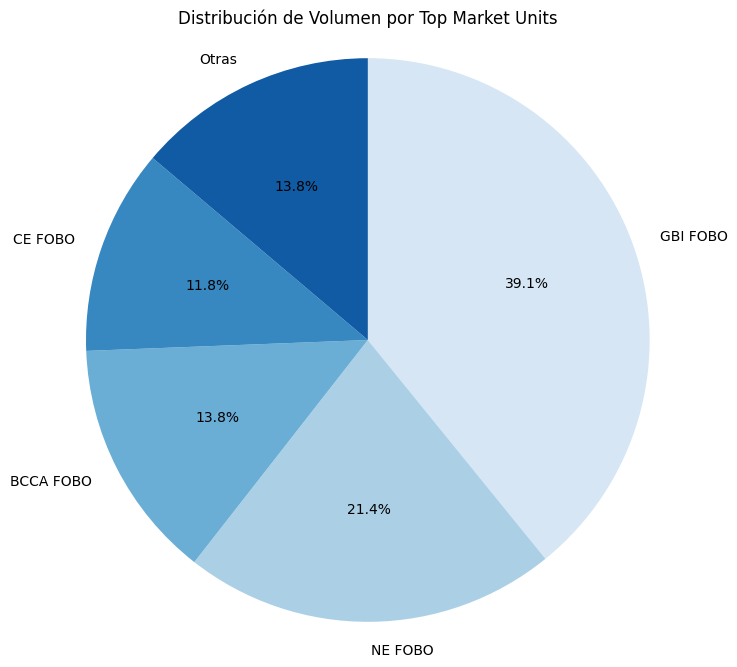

In [29]:
import seaborn as sns
# Calcular las MU con más volumen
top_mu = mu_volumen.nlargest(4)  # Tomamos solo las 4 primeras MU con más volumen.
other_mu = mu_volumen[~mu_volumen.index.isin(top_mu.index)].sum()  # Suma de las demás MU

# Crear una serie que incluye las 4 más grandes y "Otras"
top_mu = top_mu.append(pd.Series(other_mu, index=['Otras']))

# Colores de la misma gama
colores = sns.color_palette("Blues", len(top_mu))

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(top_mu, labels=top_mu.index, colors=colores, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Distribución de Volumen por Top Market Units")
plt.axis('equal')
plt.show()

Esta sería otra forma de ver las MU con el mayor volumen de ventas, y además podemos ver la proporción de estas.

### 1.3 ¿En la BU de España, cual es el ranking de España?

En esta pregunta debemos sacar a que BU pertenece España y a continuación debemos hacer un ranking de los paises que pertenecen a esa BU y ver en qué posición está España

In [33]:
# Solo registros de España
espana_data = df[df['CNTRY'] == 'Spain']

# Si hay registros de España, obtén el nombre de la Business Unit correspondiente
if not espana_data.empty:
    bu_espana = espana_data['BU'].iloc[0]  # Obtén el nombre de la BU de España
    print(f"España pertenece a la Business Unit: {bu_espana}")
else:
    print("No se encontraron registros para España en tus datos.")

España pertenece a la Business Unit: SWE


Ahora sabemos que España tiene registros en esta base de datos, y sabemos que la BU a la que pertenece es en concreto SWE.

Ahora vamos a ver el ranking de paises de la BU SWE y buscamos a España entre esos paises. En concreto para ver que posición tiene España en esa BU vamos a hacer una gráfico de barras ordenado de mayor a menor y así ver que posición ocupa, además para que sea más facil de buscarlo vamos a ponerle el color verde a nuestro objetivo.

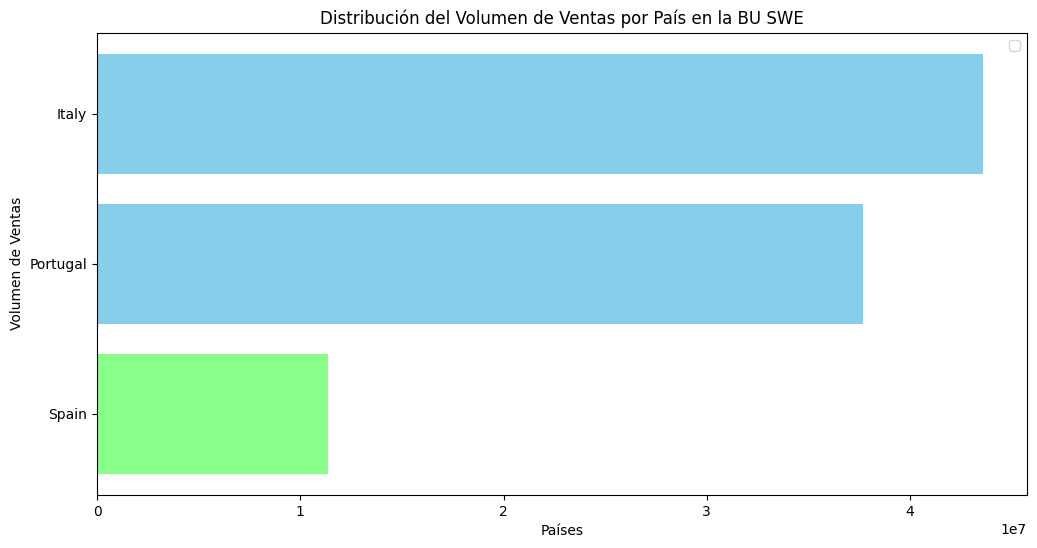

In [34]:
bu_data = (df
           .loc[df['BU']==bu_espana, :]
           .groupby('CNTRY')
           .agg({'AMT': 'sum'})
           .sort_values(by='AMT', ascending= True)
           .reset_index()
           )
colores = ['#87CEEB' if country != 'Spain' else '#88ff88' for country in bu_data['CNTRY']]

plt.figure(figsize=(12, 6))
plt.barh(bu_data['CNTRY'], bu_data['AMT'], color=colores)
plt.xlabel('Países')
plt.ylabel('Volumen de Ventas')
plt.title('Distribución del Volumen de Ventas por País en la BU SWE')
plt.legend()
plt.show()

Vemos que en la BU SWE solo enocntramos a tres paises, Italia, Portugal y España.

Como están en orden, españa ocupa el tercer y último lugar en el ranking de su BU.

## 2.	De España, ¿ Cuál es la tendencia y estacionalidad de la serie?

Para ver cuál es la serie de España, vamos a agrupar los datos por mes, sumando los valores de venta.

<ipython-input-41-fb286f0c0c58>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_espana['DATE'] = pd.to_datetime(ventas_espana['DATE'])


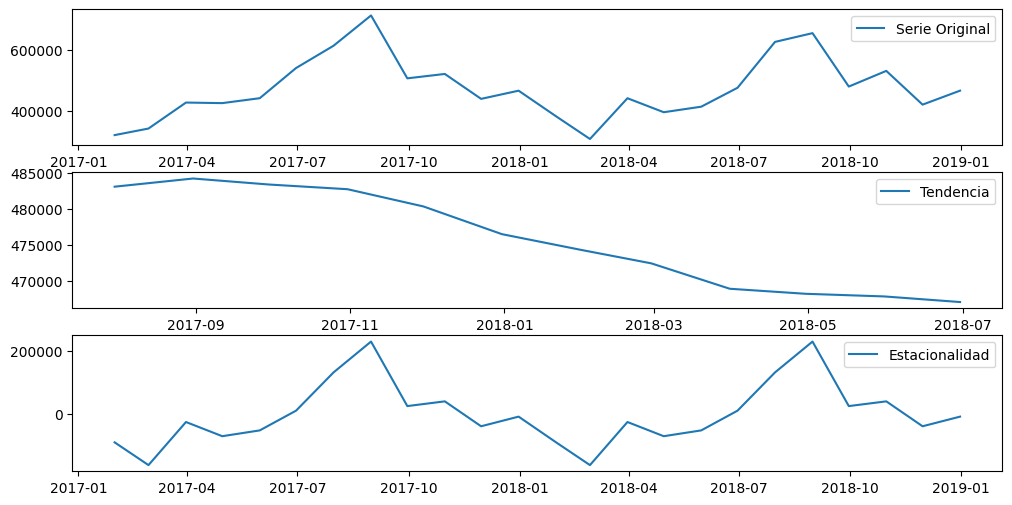

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Creo la bbdd que contenga solo las observaciones de España
ventas_espana = df[df['CNTRY'] == 'Spain']

# Convierte la columna 'DATE' en tipo datetime
ventas_espana['DATE'] = pd.to_datetime(ventas_espana['DATE'])

# Establece la columna 'DATE' como índice
ventas_espana.set_index('DATE', inplace=True)

# Agrupamos los datos por mes y sumar el volumen de ventas
ventas_mensuales = ventas_espana['AMT'].resample('M').sum()

# Define la frecuencia de la serie, mensual
frecuencia = 12

# Descomposición de la serie de tiempo
descomposicion = seasonal_decompose(ventas_mensuales, model='additive', period=frecuencia)

# Visualiza la serie original, tendencia y estacionalidad
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(ventas_mensuales, label='Serie Original')
plt.legend()
plt.subplot(312)
plt.plot(descomposicion.trend, label='Tendencia')
plt.legend()
plt.subplot(313)
plt.plot(descomposicion.seasonal, label='Estacionalidad')
plt.legend()

De esta manera conseguimos ver la serie, en primera posición, que nos representa las ventas desde enero de 2017 hasta enero de 2019.

Si viesemos solo esa gráfica analizaríamos la tendencia por tramos. Diríamos que desde enero hasta septiembre de 2017 la tendencia es positiva porque la gráfica globalmente crece, desde septiembre de 2017 hasta marzo de 2018 la tendencia es claramente negativa, desde marzo de 2018 hasta septiembre de 2018 vuelve a crecer la tendiendia y por último vemos que en el último tramo la tendencia es negativa, la serie decrece.

Pero tenemos una función que me saca directamente la tendencia de la serie global, se ve en la segunda gráfica, aquí vemos que la tendencia es negativa globalmente.

Y en la última gráfica se representa la estacionalidad, vemos que desde el principio de la gráfica hasta febrero del año siguente, a partir de ahí se vuelven a repetir los meses, es decir, septiembre siempre es el que más ventas tiene y marzo el que menos. Por lo que concluimos que la serie es estacional.

## 3. Si tuvieses que mejorar las ventas de Europa ¿En que país te centrarías para aplicar medidas?

Este ejercicio en particular se podría hacer de bastantes maneras.

En particular lo que voy a hacer es caulcular es tendencia

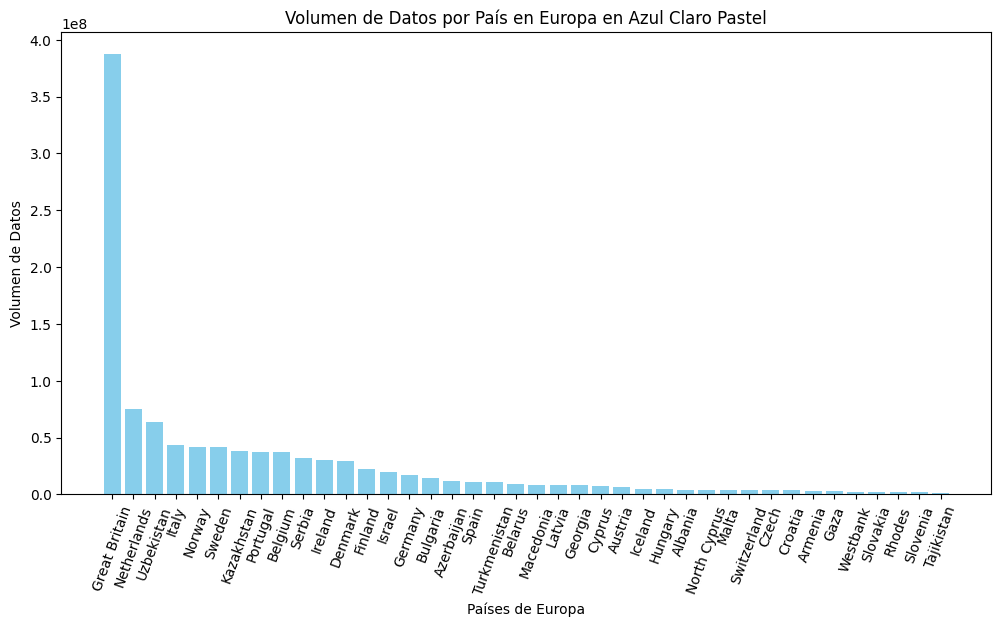

In [42]:
# Filtrar solo los países de Europa
paises_europa = df[df['SCTR'] == 'Europe']

# Agrupar por país y calcular la suma del volumen de datos
volumen_por_pais = paises_europa.groupby('CNTRY')['AMT'].sum()

# Ordenar los datos por volumen de datos de manera descendente
volumen_por_pais = volumen_por_pais.sort_values(ascending=False)

# Crear una gráfica de barras para mostrar el volumen de datos por país en azul claro pastel
plt.figure(figsize=(12, 6))

# Crea una lista de colores, todas iguales
colores = ['#87CEEB'] * len(volumen_por_pais)

plt.bar(volumen_por_pais.index, volumen_por_pais.values, color=colores)
plt.xlabel('Países de Europa')
plt.ylabel('Volumen de Datos')
plt.title('Volumen de Datos por País en Europa en Azul Claro Pastel')
plt.xticks(rotation=70)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que 'DATE' sea de tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Agrupa los datos por 'CNTRY' y mes, y suma las ventas en cada mes
ventas_por_pais_mes = df.groupby(['CNTRY', df['DATE'].dt.to_period('M')])['AMT'].sum().unstack()

# Convierte el índice en una lista de meses
meses = [str(m) for m in ventas_por_pais_mes.columns]

# Trazar un gráfico de líneas para cada país
plt.figure(figsize=(12, 6))
for pais in ventas_por_pais_mes.index:
    plt.plot(meses, ventas_por_pais_mes.loc[pais], label=pais)

plt.title('Ventas Mensuales por País (CNTRY)')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['DATE'] = pd.to_datetime(df['DATE'])

# Agrupa los datos por 'CNTRY' y mes, y suma las ventas en cada mes
ventas_por_pais_mes = df.groupby(['CNTRY', df['DATE'].dt.to_period('M')])['AMT'].sum().unstack()

# Convierte el índice en una lista de meses
meses = [str(m) for m in ventas_por_pais_mes.columns]

# Trazar un gráfico de líneas para la tendencia de ventas por país
plt.figure(figsize=(12, 6))
for pais in ventas_por_pais_mes.index:
    ventas = ventas_por_pais_mes.loc[pais].dropna()

    # Realiza un análisis de descomposición de la serie de tiempo para cada país
    frecuencia = 12
    descomposicion = seasonal_decompose(ventas, model='additive', period=frecuencia)

    plt.plot(meses[:len(descomposicion.trend)], descomposicion.trend, label=f'Tendencia ({pais})')

plt.title('Tendencia de Ventas Mensuales por País (CNTRY)')
plt.xlabel('Mes')
plt.ylabel('Tendencia de Ventas')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [ ]:

ventas_por_pais_mes = df.groupby(['CNTRY', df['DATE'].dt.to_period('M')])['AMT'].sum().reset_index().set_index('DATE')
ventas_por_pais_mes_A = ventas_por_pais_mes[ventas_por_pais_mes['CNTRY']=='Czech']
ventas_por_pais_mes_A

In [ ]:

ventas_por_pais_mes = df.groupby(['CNTRY', df['DATE'].dt.to_period('M')])['AMT'].sum().unstack()
ventas_por_pais_mes

In [ ]:
meses = [str(m) for m in ventas_por_pais_mes.columns]

# Crear una gráfica independiente para la tendencia de ventas por país
for pais in ventas_por_pais_mes.index:
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    ventas = ventas_por_pais_mes.loc[pais].dropna()

    # Realiza un análisis de descomposición de la serie de tiempo para cada país
    frecuencia = 12
    descomposicion = seasonal_decompose(ventas, model='additive', period=frecuencia)

    # Trazar la tendencia para cada país
    plt.plot(meses[:len(descomposicion.trend)], descomposicion.trend)

    plt.title(f'Tendencia de Ventas Mensuales ({pais})')
    plt.xlabel('Mes')
    plt.ylabel('Tendencia de Ventas')
    plt.show()